In [61]:
import pandas_datareader.data as web
import datetime
import pandas as pd
from functools import reduce


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

portfolio = pd.read_csv("stockDataUS.csv")

portfolio = portfolio.iloc[1:506]
# drop first column
portfolio = portfolio.drop(portfolio.columns[0], axis=1)

# # take only first 10 columns
# portfolio = portfolio.iloc[:, 1:10]

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientCVaR

mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

S = portfolio.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()
cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

print(ef_cvar.portfolio_performance(verbose=True))



{'ADANIPORTS': 0.0, 'ASIANPAINT': 0.0, 'AXISBANK': 0.0, 'HDFC': 0.15381, 'ITC': 0.0, 'TCS': 0.37388, 'LT': 0.47231, 'HINDUNILVR': 0.0, 'INFY': 0.0, 'ICICIBANK': 0.0, 'RELIANCE': 0.0, 'KOTAKBANK': 0.0, 'HEROMOTOCO': 0.0, 'WIPRO': 0.0, 'HCLTECH': 0.0}
Expected annual return: 11.2%
Conditional Value at Risk: -127639.70%
(0.1117399218979876, -1276.3970183144831)


/home/codeubuntu/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


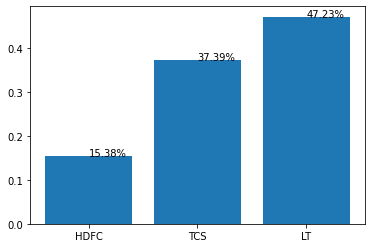

In [62]:
# make a bar chart of the weights
import matplotlib.pyplot as plt
# ignore the weights that are 0
weights = {k: v for k, v in cleaned_weights.items() if v > 0}
# show the percentage of the portfolio on top of the bars
for i in weights:
    plt.text(i, weights[i], f"{weights[i]*100:.2f}%")
plt.bar(weights.keys(), weights.values())
plt.show()


In [63]:
# on the above weights we can find the expected return and the volatility
# then we can find the sharpe ratio
import numpy as np
weights = list(cleaned_weights.values())
weights = np.array(weights)
risk_free_rate = 0.075
returns = portfolio.pct_change().dropna()
cov_matrix = returns.cov()
portfolio_return = np.sum(returns.mean() * weights) * 252
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print(portfolio_return, portfolio_std_dev, sharpe_ratio)

0.13895729881908106 0.17428819275420385 0.36696288950152306


Test Days:  100
Test Period:  1201  to  1301
Expected Return:  -0.14935589449819514
Volatility:  0.207215808979633
Sharpe Ratio:  -1.0827161093690822


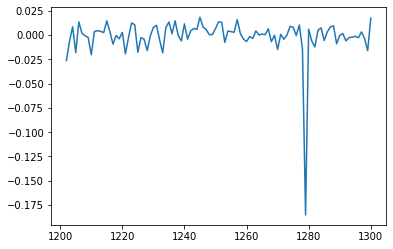

---------------------------------------------------
Test Days:  200
Test Period:  1201  to  1401
Expected Return:  -0.06204676842266275
Volatility:  0.22596909032120163
Sharpe Ratio:  -0.6064845781688943


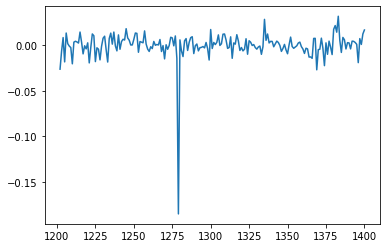

---------------------------------------------------
Test Days:  500
Test Period:  1201  to  1701
Expected Return:  -0.0020860819718922594
Volatility:  0.27330280830866094
Sharpe Ratio:  -0.282053750010623


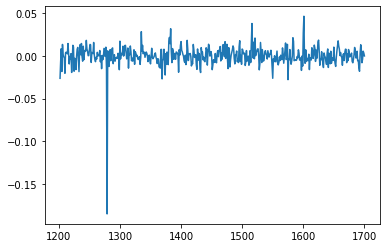

---------------------------------------------------


In [65]:
stockData = pd.read_csv("stockData.csv")

testDays = [100,200,500]
testStart = 1201

for i in range(len(testDays)):
    print("Test Days: ", testDays[i])
    testEnd = testStart + testDays[i]
    portfolio_test = stockData.iloc[testStart:testEnd, :]
    portfolio_test = portfolio_test.drop(portfolio_test.columns[0], axis=1)
    returns = portfolio_test.pct_change().dropna()
    cov_matrix = returns.cov()
    portfolio_return = np.sum(returns.mean() * weights) * testDays[i]
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(testDays[i])
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    # print the expected return, volatility and sharpe ratio and test period in a table
    print("Test Period: ", testStart, " to ", testEnd)
    print("Expected Return: ", portfolio_return)
    print("Volatility: ", portfolio_std_dev)
    print("Sharpe Ratio: ", sharpe_ratio)

    daily_returns = portfolio_test.pct_change()
    daily_returns = daily_returns.dropna()
    daily_returns = daily_returns * weights
    daily_returns = daily_returns.sum(axis=1)
    plt.plot(daily_returns)
    plt.show()
    print("---------------------------------------------------")

    